## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import mean_squared_error , mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing Data

In [ ]:
train_data= pd.read_csv("/content/drive/MyDrive/Hackathon/cuboulderdassahackathonrgression/loans_train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Hackathon/cuboulderdassahackathonrgression/loans_test_data.csv")

In [ ]:
test_data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,initial_listing_status,disbursement_method,id
0,vp,2.0,IL,MORTGAGE,75000.0,Not Verified,26.19,NaN,NaN,NaN,...,95.2,0,0,credit_card,individual,20000,60,whole,Cash,7001
1,irrigation service technician,5.0,NJ,RENT,28000.0,Source Verified,21.86,NaN,NaN,NaN,...,100.0,0,0,other,individual,2000,36,whole,Cash,7002
2,surgical assistant,2.0,LA,MORTGAGE,25992.0,Verified,9.25,NaN,NaN,NaN,...,88.9,0,0,debt_consolidation,individual,12000,36,whole,Cash,7003
3,NaN,NaN,NV,RENT,33000.0,Source Verified,3.89,NaN,NaN,NaN,...,100.0,0,1,debt_consolidation,individual,5000,36,fractional,Cash,7004
4,teacher,10.0,AL,RENT,47000.0,Not Verified,15.82,NaN,NaN,NaN,...,94.4,0,0,home_improvement,individual,2000,36,fractional,Cash,7005


In [ ]:
train_data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method,id
0,instructor,2.0,NY,RENT,45000.0,Source Verified,6.71,NaN,NaN,NaN,...,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash,1
1,owner,10.0,CA,RENT,68000.0,Source Verified,18.99,NaN,NaN,NaN,...,0,1,small_business,individual,7200,36,16.01,whole,Cash,2
2,merchandiser,10.0,TN,OWN,15000.0,Source Verified,20.83,NaN,NaN,NaN,...,0,0,credit_card,individual,5000,36,11.99,whole,Cash,3
3,deputy clerk,2.0,OH,MORTGAGE,35000.0,Verified,35.56,NaN,NaN,NaN,...,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay,4
4,teacher,2.0,UT,RENT,34000.0,Not Verified,13.20,NaN,NaN,NaN,...,0,0,credit_card,individual,1200,36,10.90,whole,Cash,5


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         6431 non-null   object 
 1   emp_length                        6443 non-null   float64
 2   state                             7000 non-null   object 
 3   homeownership                     7000 non-null   object 
 4   annual_income                     7000 non-null   float64
 5   verified_income                   7000 non-null   object 
 6   debt_to_income                    6986 non-null   float64
 7   annual_income_joint               1059 non-null   float64
 8   verification_income_joint         1034 non-null   object 
 9   debt_to_income_joint              1059 non-null   float64
 10  delinq_2y                         7000 non-null   int64  
 11  months_since_last_delinq          3060 non-null   float64
 12  earlie

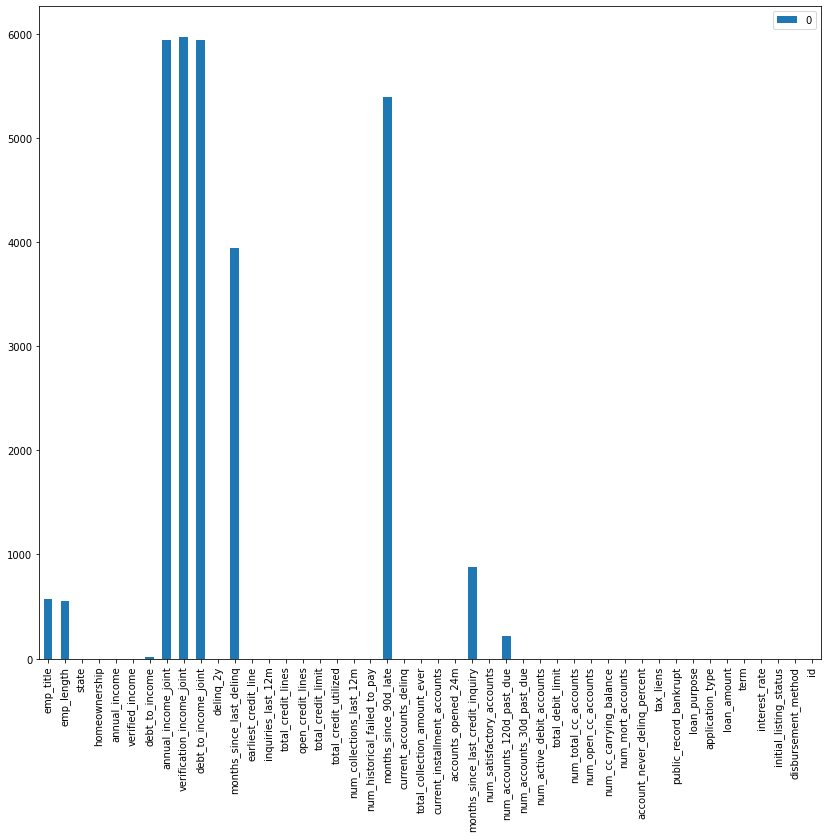

In [ ]:
pd.DataFrame(train_data.isna().sum()).plot(kind = 'bar', figsize = (14,12))

In [ ]:
mod_train_data = train_data.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint'],axis = 1)

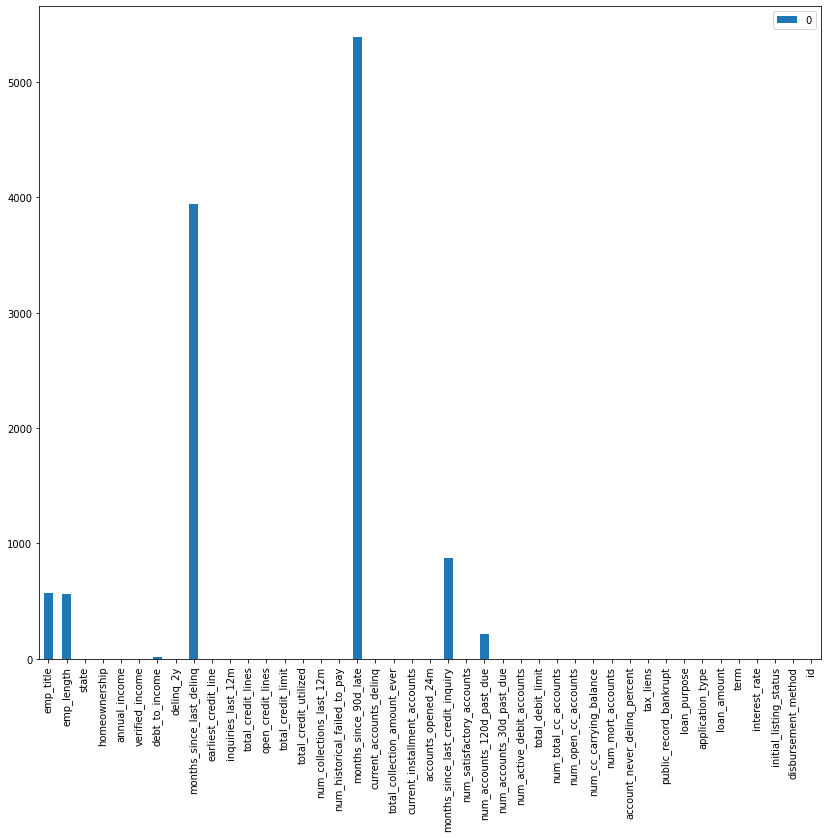

In [ ]:
pd.DataFrame(mod_train_data.isna().sum()).plot(kind = 'bar', figsize = (14,12))

In [ ]:
mod_train_data['months_since_last_delinq'].unique()

array([ nan,  29.,  47.,  52.,  35.,  53.,  77.,  76.,  25.,  41.,  19.,
        68.,  59.,   6.,  13.,  18.,  44.,  50.,  36.,   3.,  17.,   4.,
        42.,  12.,  16.,  28.,  48.,   9.,  63.,  26.,  31.,  10.,  43.,
        40.,  54.,  45.,  70.,  67.,  49.,  20.,  11.,  62.,  73.,  58.,
        60.,  27.,  55.,  69.,  30.,  38.,  37.,  80.,  39.,  34.,  22.,
        15.,   7.,  81.,  75.,  57.,  79.,  74.,  66.,  46.,  71.,  21.,
        32.,  23.,  33.,  51.,   8.,  64.,  56.,  14.,  24.,  65.,  61.,
        82.,  72.,  78., 100.,  96.,  98.,   5.,  84.,   2.,  89.,   1.,
        88., 109., 101., 102.,  87.,  99.,  83., 106.])

In [ ]:
mod_train_data['months_since_last_delinq'] = mod_train_data['months_since_last_delinq'].fillna(199)

In [ ]:
mod_train_data['months_since_90d_late'].unique()

array([ nan,  59.,  52.,  35.,  76.,  68.,  15.,  73.,  23.,  57.,   6.,
        70.,   4.,  28.,  49.,  54.,   9.,  53.,  18.,  31.,  48.,  66.,
        45.,  47.,  63.,  24.,  50.,   3.,  67.,  62.,  78.,  44.,  13.,
        42.,  12.,  72.,  80.,  34.,  51.,  69.,  97.,  36.,  81.,  75.,
        25.,  74.,  22.,  30.,  21.,  39.,  29.,  11.,  33.,  37.,  10.,
        77.,  55.,  65.,  79.,  38.,  32.,  26.,  27.,  64.,  56.,  16.,
        71.,  19.,  14.,   7.,  43.,  60.,  61.,  82.,  46.,  17.,  40.,
        58., 100.,  41.,  96.,  98.,   2., 128., 115.,  89.,   5.,  88.,
       109., 101.,  87.,  84., 113.,  20., 102.,  99.,   8.,  83., 106.,
        90., 118., 107.])

In [ ]:
mod_train_data['months_since_90d_late'] = mod_train_data['months_since_90d_late'].fillna(199)

In [ ]:
len(mod_train_data['emp_length'].unique())

12

In [ ]:
mod_train_data[['emp_length', 'emp_title']].head(20) 

,emp_length,emp_title
0,2.0,instructor
1,10.0,owner
2,10.0,merchandiser
3,2.0,deputy clerk
4,2.0,teacher
5,1.0,personal banker
6,5.0,manufacturing engineer
7,7.0,order processing manager
8,2.0,physician assistant
9,2.0,warehouse manager


In [ ]:
len(mod_train_data[mod_train_data['emp_length'] == 0])

491

In [ ]:
mod_train_data['emp_length'] = mod_train_data['emp_length'].fillna(-10)

In [ ]:
mod_train_data = mod_train_data.drop('emp_title', axis = 1)

In [ ]:
mod_train_data.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method,id
0,2.0,NY,RENT,45000.0,Source Verified,6.71,0,199.0,2011,0,...,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash,1
1,10.0,CA,RENT,68000.0,Source Verified,18.99,0,199.0,1971,1,...,0,1,small_business,individual,7200,36,16.01,whole,Cash,2
2,10.0,TN,OWN,15000.0,Source Verified,20.83,0,199.0,2007,1,...,0,0,credit_card,individual,5000,36,11.99,whole,Cash,3
3,2.0,OH,MORTGAGE,35000.0,Verified,35.56,0,29.0,2007,3,...,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay,4
4,2.0,UT,RENT,34000.0,Not Verified,13.20,0,199.0,2011,0,...,0,0,credit_card,individual,1200,36,10.90,whole,Cash,5


In [ ]:
len(mod_train_data.state.unique())

50

In [ ]:
west = {'AK','AX','CA','CO','HI','ID','MT', 'NM','NV','OR','UT', 'WA', 'WY'}
south = {'AL','AR','DC','DE', 'FL','GA','KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'}
ne = {'CT', 'MA','ME','NH', 'NJ','NY', 'PA', 'RI', 'VT' }
mw = {'IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH','SD', 'WI'}

In [ ]:
for i in range(len(mod_train_data)):
  if mod_train_data.state[i] in west:
    mod_train_data.state[i] = 'west'
  if mod_train_data.state[i] in south:
    mod_train_data.state[i] = 'south'
  if mod_train_data.state[i] in ne:
    mod_train_data.state[i] = 'ne'
  if mod_train_data.state[i] in mw:
    mod_train_data.state[i] = 'mw'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib

In [ ]:
mod_train_data_df_t = mod_train_data.dropna(subset=['debt_to_income'], how = 'all')

In [ ]:
train_df = mod_train_data_df_t 

In [ ]:
train_df['months_since_last_credit_inquiry'].unique()

array([nan,  3.,  1.,  0., 21.,  6., 14., 13.,  8., 22., 18., 17.,  2.,
        4., 20., 11.,  5., 16.,  7.,  9., 12., 19., 10., 15., 24., 23.])

In [ ]:
train_df['months_since_last_credit_inquiry'] = train_df['months_since_last_credit_inquiry'].fillna(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_df = train_df.drop('num_accounts_120d_past_due', axis = 1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6986 entries, 0 to 6999
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        6986 non-null   float64
 1   state                             6986 non-null   object 
 2   homeownership                     6986 non-null   object 
 3   annual_income                     6986 non-null   float64
 4   verified_income                   6986 non-null   object 
 5   debt_to_income                    6986 non-null   float64
 6   delinq_2y                         6986 non-null   int64  
 7   months_since_last_delinq          6986 non-null   float64
 8   earliest_credit_line              6986 non-null   int64  
 9   inquiries_last_12m                6986 non-null   int64  
 10  total_credit_lines                6986 non-null   int64  
 11  open_credit_lines                 6986 non-null   int64  
 12  total_

## Data Visualization

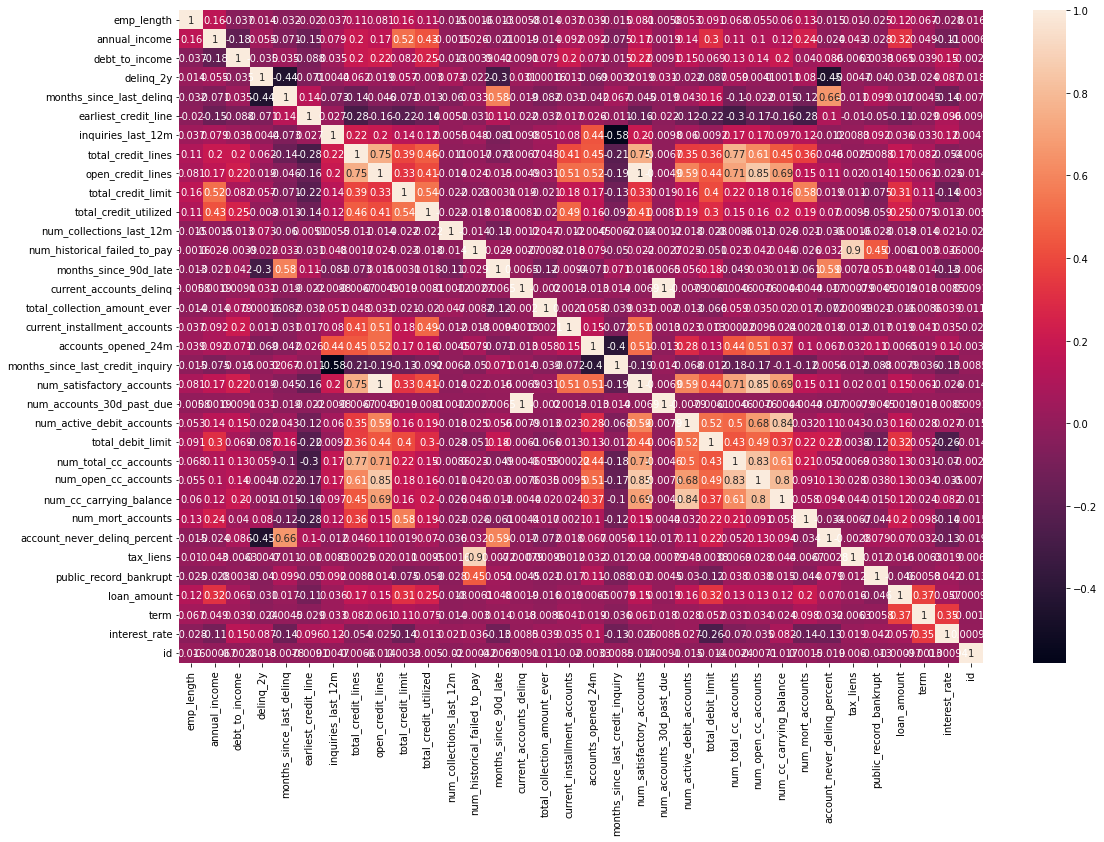

In [ ]:
plt.figure(figsize = (18,12))
sns.heatmap(train_df.corr(), annot = True )
plt.show()

In [ ]:
final_train = train_df.drop(['num_satisfactory_accounts', 'num_accounts_30d_past_due','num_total_cc_accounts',
                        'num_open_cc_accounts', 'tax_liens', 'id'], axis = 1)

In [ ]:
final_train.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method
0,2.0,ne,RENT,45000.0,Source Verified,6.71,0,199.0,2011,0,...,0,100.0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash
1,10.0,west,RENT,68000.0,Source Verified,18.99,0,199.0,1971,1,...,1,100.0,1,small_business,individual,7200,36,16.01,whole,Cash
2,10.0,south,OWN,15000.0,Source Verified,20.83,0,199.0,2007,1,...,0,100.0,0,credit_card,individual,5000,36,11.99,whole,Cash
3,2.0,mw,MORTGAGE,35000.0,Verified,35.56,0,29.0,2007,3,...,1,93.8,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay
4,2.0,west,RENT,34000.0,Not Verified,13.20,0,199.0,2011,0,...,0,100.0,0,credit_card,individual,1200,36,10.90,whole,Cash


## Feature Encoding

In [ ]:
encoder = preprocessing.LabelEncoder()

In [ ]:
for i in (final_train.columns):
  if final_train[i].dtype == 'O':
    final_train[i] = encoder.fit_transform(final_train[i])

In [ ]:
final_train.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method
0,2.0,2,2,45000.0,1,6.71,0,199.0,2011,0,...,0,100.0,0,2,0,12000,60,19.03,1,0
1,10.0,4,2,68000.0,1,18.99,0,199.0,1971,1,...,1,100.0,1,10,0,7200,36,16.01,1,0
2,10.0,3,1,15000.0,1,20.83,0,199.0,2007,1,...,0,100.0,0,1,0,5000,36,11.99,1,0
3,2.0,1,0,35000.0,2,35.56,0,29.0,2007,3,...,1,93.8,0,2,0,12800,60,23.88,1,1
4,2.0,4,2,34000.0,0,13.20,0,199.0,2011,0,...,0,100.0,0,1,0,1200,36,10.90,1,0


In [ ]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6986 entries, 0 to 6999
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        6986 non-null   float64
 1   state                             6986 non-null   int64  
 2   homeownership                     6986 non-null   int64  
 3   annual_income                     6986 non-null   float64
 4   verified_income                   6986 non-null   int64  
 5   debt_to_income                    6986 non-null   float64
 6   delinq_2y                         6986 non-null   int64  
 7   months_since_last_delinq          6986 non-null   float64
 8   earliest_credit_line              6986 non-null   int64  
 9   inquiries_last_12m                6986 non-null   int64  
 10  total_credit_lines                6986 non-null   int64  
 11  open_credit_lines                 6986 non-null   int64  
 12  total_

## Data Visualizations

### Earliest_credit_line vs Interest Rates

### Regions Wise Credits Lines

In [ ]:
import altair as alt
from vega_datasets import data

In [ ]:
states = alt.topo_feature(data.us_10m.url, 'states')

variable_list = ['interest_rate']

alt.Chart(states).mark_geoshape().encode(
    color='interest_rate:Q'
).transform_lookup(
    lookup='states',
    from_=alt.LookupData(mod_train_data, 'states', list(mod_train_data.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

NameError: ignored

## Dividing to Train and Test

In [ ]:
y = final_train['interest_rate']
x = final_train.drop('interest_rate', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size = 0.2)

## Model Design

### Random Forest

In [ ]:
rf_reg = RandomForestRegressor()
k = 5
score_rf = cross_val_score(rf_reg ,X_train, y_train , cv = k , scoring = 'neg_mean_squared_log_error' )

In [ ]:
score_rf

array([-0.08170201, -0.07324308, -0.07540938, -0.07845029, -0.08021456])

In [ ]:
(np.sqrt(np.abs(score_rf))).mean()

0.27887788863972746

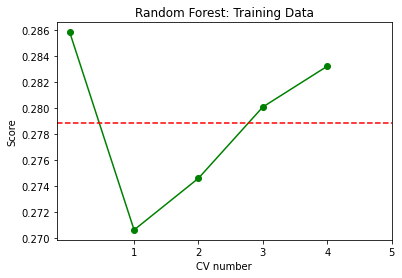

In [ ]:
a = [1,2,3,4,5]
plt.plot((np.sqrt(np.abs(score_rf))), color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("Random Forest: Training Data")
plt.xticks(a)
plt.axhline(y=(np.sqrt(np.abs(score_rf))).mean(), color='r', linestyle='--')
plt.show()

### AdaBoost

In [ ]:
ab_reg = AdaBoostRegressor()
score_ab = cross_val_score(ab_reg ,X_train, y_train , cv = k , scoring = 'neg_mean_squared_log_error' )

In [ ]:
score_ab

array([-0.12567057, -0.11432259, -0.12140901, -0.11675294, -0.11438394])

In [ ]:
(np.sqrt(np.abs(score_ab))).mean()

0.3441905786387534

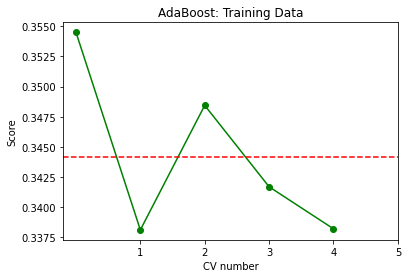

In [ ]:
a = [1,2,3,4,5]
plt.plot((np.sqrt(np.abs(score_ab))), color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("AdaBoost: Training Data")
plt.xticks(a)
plt.axhline(y=(np.sqrt(np.abs(score_ab))).mean(), color='r', linestyle='--')
plt.show()

## XGBoost

In [ ]:
xg_reg = XGBRegressor()
score_xg = cross_val_score(xg_reg ,X_train, y_train , cv = k , scoring = 'neg_mean_squared_log_error' )

[08:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
score_xg

array([-0.07493141, -0.06731807, -0.07010159, -0.07309801, -0.07307244])

In [ ]:
(np.sqrt(np.abs(score_xg))).mean()

0.26772918159324915

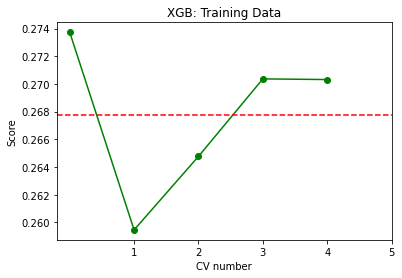

In [ ]:
a = [1,2,3,4,5]
plt.plot((np.sqrt(np.abs(score_xg))), color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("XGB: Training Data")
plt.xticks(a)
plt.axhline(y=(np.sqrt(np.abs(score_xg))).mean(), color='r', linestyle='--')
plt.show()

## Models on test Data

In [ ]:
rf_model = rf_reg.fit(X_train, y_train)
ab_model = ab_reg.fit(X_train, y_train)
xgb_model = xg_reg.fit(X_train, y_train)

[08:15:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pre_rf = rf_model.predict(X_test)
pre_ab = ab_model.predict(X_test)
pre_xg = xgb_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_log_error(pre_rf,y_test)), np.sqrt(mean_squared_log_error(pre_ab,y_test)), np.sqrt(mean_squared_log_error(pre_xg,y_test))

(0.2779947284937015, 0.3524917160843959, 0.2673058647705082)

## Hyperparameter Tuning

XGBoost has least RMSE so using that for further work.

In [ ]:
params = {'max_depth': [2,3,4],
          'n_estimators': [250,300,350],
          'eta': [0.008,0.009,0.01],
          'subsample':[0.4, 0.5, 0.6],
          'colsample_bytree': [0.5,0.6,0.7]}

In [ ]:
mod_xgb = RandomizedSearchCV(estimator =XGBRegressor(),
                             param_distributions=params,
                             scoring = 'neg_mean_squared_log_error',
                             n_iter = 25)

In [ ]:
mod_xgb.fit(X_train, y_train)

[08:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(estimator=XGBRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7],
                                        'eta': [0.008, 0.009, 0.01],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [250, 300, 350],
                                        'subsample': [0.4, 0.5, 0.6]},
                   scoring='neg_mean_squared_log_error')

## 1nd Iter results : RMSLE 0.2639

In [ ]:
mod_xgb.best_params_

{'subsample': 0.5,
 'n_estimators': 300,
 'max_depth': 3,
 'eta': 0.009,
 'colsample_bytree': 0.6}

## 2nd Iter results : RMSLE 0.2633

In [ ]:
mod_xgb.best_params_

{'subsample': 0.5,
 'n_estimators': 250,
 'max_depth': 3,
 'eta': 0.01,
 'colsample_bytree': 0.6}

## Final XGB Regressor

In [ ]:
xg_reg_fin = XGBRegressor(subsample = .5, n_estimators = 250, max_depth = 3, eta = 0.01, colsample_bytree = 0.6)

In [ ]:
scf = cross_val_score(xg_reg_fin ,X_train, y_train , cv = k , scoring = 'neg_mean_squared_log_error' )

[08:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
(np.sqrt(np.abs(scf))).mean()

0.2633687918395364

In [ ]:
np.sqrt(np.abs(cross_val_score(xg_reg_fin , X_test, y_test , cv = k , scoring = 'neg_mean_squared_log_error' ))).mean()

[08:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.28474270256197476

## Final Model

In [ ]:
final_model = xg_reg_fin.fit(x , y)

[08:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Predicting on the actual Test Data

In [ ]:
def clean(data):
  mod_train_data = data.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint'],axis = 1)
  mod_train_data['months_since_last_delinq'] = mod_train_data['months_since_last_delinq'].fillna(199)
  mod_train_data['months_since_90d_late'] = mod_train_data['months_since_90d_late'].fillna(199)
  mod_train_data['emp_length'] = mod_train_data['emp_length'].fillna(-10)
  mod_train_data = mod_train_data.drop('emp_title', axis = 1)

  for i in range(len(mod_train_data)):
    if mod_train_data.state[i] in west:
      mod_train_data.state[i] = 'west'
    if mod_train_data.state[i] in south:
      mod_train_data.state[i] = 'south'
    if mod_train_data.state[i] in ne:
      mod_train_data.state[i] = 'ne'
    if mod_train_data.state[i] in mw:
      mod_train_data.state[i] = 'mw'

  # train_df = mod_train_data.dropna(subset=['debt_to_income'], how = 'all')
  train_df = mod_train_data
  train_df['months_since_last_credit_inquiry'] = train_df['months_since_last_credit_inquiry'].fillna(25)
  train_df = train_df.drop('num_accounts_120d_past_due', axis = 1)
  final_train = train_df.drop(['num_satisfactory_accounts', 'num_accounts_30d_past_due','num_total_cc_accounts',
                        'num_open_cc_accounts', 'tax_liens'], axis = 1)
  
  for i in (final_train.columns):
    if final_train[i].dtype == 'O':
      final_train[i] = encoder.fit_transform(final_train[i])
  
  return final_train


In [ ]:
cleaned_test_data = clean(test_data)
submission_test = pd.DataFrame()
submission_test['id'] = cleaned_test_data['id']
cleaned_test_data = cleaned_test_data.drop('id', axis = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

In [ ]:
predictions = final_model.predict(cleaned_test_data)

In [ ]:

submission_test['interest_rate'] = predictions

In [ ]:
submission_test

,id
0,7001
1,7002
2,7003
3,7004
4,7005
...,...
2995,9996
2996,9997
2997,9998
2998,9999


In [ ]:
submission_test.to_csv('submission.csv', index = False)